# Section 3: 3D visualisation and plotting

This Section explains the use of 3D plotting, and introduces GeoVista and PyVista.


## 3D visualisation

LFRic data can be plotted in a 3D viewer without the need of regridding. Regridding which allows traditional plotting is explained in [Section 04](./Sec_04_Regridding.ipynb). Software componenets used for 3D visualisation are [**VTK**](https://vtk.org/) (3D visualisation C++ library), [**PyVista**](https://pyvista.org/) (VTK for Python) and [**GeoVista**](https://github.com/bjlittle/geovista#readme). GeoVista adds geolocation for PyVista, including map projections, transforms, coastlines, geolocated data and regions. The GeoVista project page claims that "GeoVista is to PyVista, as Cartopy is to Matplotlib".

### Geovista basic demo
The following example is meant as a simple self-contained demonstration of interactive ocean data plotting with geovista. It uses the function `popup_2d_data_xx_yy` provided in [display_demo_routines.py](./display_demo_routines.py). 


In [4]:
import geovista as gv
from geovista.pantry import um_orca2
from display_demo_routines import popup_2d_data_xx_yy

example_data = um_orca2()
popup_2d_data_xx_yy(example_data, "ORCA test data")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Using GeoVista/PyVista with Iris

There are currently no facilities in Iris for plotting unstructed cubes. To use PyVista for plotting we need to convert our unstructured LFRic data to a PyVista format. Some user code is needed to bridge between Iris and Geovista. Let's use the code in [testdata_fetching.py](./testdata_fetching.py) to load some LFRic test data with Iris first:


In [5]:
# Load a 2D 'relative_humidity' cube data, with tutorial utility function

from testdata_fetching import lfric_rh_singletime_2d
lfric_rh = lfric_rh_singletime_2d()
#lfric_rh


### Convert an Iris cube to a PyVista PolyData object

Next we convert the Iris cube `lfric_rh` to a PyVista [PolyData](https://docs.pyvista.org/api/core/_autosummary/pyvista.PolyData.html) object by using the utility function `pv_from_lfric_cube` provided in [pv_conversion.py](./pv_conversions.py):

In [6]:
from pv_conversions import pv_from_lfric_cube

pv = pv_from_lfric_cube(lfric_rh)
#print(pv)
#pv

Uncomment the last line above to print PolyData object `pv` (like cubes and  cube lists, these PolyData objects are provided with a specific visible for printing within the Jupyter notebooks).

### Display instant 3D plot

We can create an interactive plot of a `PolyData` object simply by calling its `.plot()` method. This plot is interactive. Try dragging to rotate, and the mouse scroll-wheel to zoom. To remove a plot output, in a notebook, use "Clear Output" from the "Edit" menu (or from right-click on the cell).

In [7]:
pv.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Create a plotter to display 3D visualisation of data from Iris

There are many keywords available to the [`PolyData.plot()` method](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.plot.html). But to achieve finer control we chose different way: Creating a GeoVista/PyVista `Plotter` object. The full process for this involves a few steps:

#### Create a pyvista.Plotter 
We will create a [PyVista plotter](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.Plotter.html#pyvista.Plotter) object to display things in 3D. Since our data is geo-located, we will use the special subtype `GeoPlotter`, from [GeoVista](https://github.com/bjlittle/geovista#philisophy). Various control arguments can be added to `GeoPlotter()` but none are required by default.


In [8]:
from geovista import GeoPlotter
plotter = GeoPlotter()

#### Call the plotter add_mesh function
Next, we pass in the PolyData object `pv` to the [add_mesh](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.BasePlotter.add_mesh.html#add-mesh) function. For now we don't need the object which this passes back, so we just discard it. There are lots of possible keywords, but none are required.

In [9]:
_ = plotter.add_mesh(pv)

#### Showing the plotter

Calling [Plotter.show()](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.Plotter.show.html#pyvista.Plotter.show) allows to display the plot.


In [10]:
plotter.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

VTK/PyVista doesn't use plot "types". Instead, you add meshes to a plotter and can subsequently control the presentation. By default, `plotter.show()` opens an interactive window. You can instead generate static output. In a notebook, you can generate static output with `jupyter_backend='static'`, in a Python session with `interactive=False`.


### Additional features

The above hasn't yet actually added to what we can do with a simple`PolyData.plot()`. However, when you create your own GeoPlotter, you can do a lot more to control the view, e.g. using GeoPlotter methods [add_coastlines](https://github.com/bjlittle/geovista/blob/v0.1.1/src/geovista/geoplotter.py#L193-L215), [add_axes](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.BasePlotter.add_axes.html#pyvista.BasePlotter.add_axes) and [add_base_layer](https://github.com/bjlittle/geovista/blob/v0.1.1/src/geovista/geoplotter.py#L122-L159). Coastlines and base_layer are GeoVista concepts, while axes are from PyVista. The `GeoPlotter` is simply a specialised version of a `PyVista.Plotter`.


Have look into the source of the `demo_display_2d_xx_yy_data` routine in [display_demo_routines.py](./display_demo_routines.py). Another very useful resource are the GeoVista runnable [examples](https://github.com/bjlittle/geovista/tree/main/src/geovista/examples)

### Controlling the 3D view

Unlike 2D plotting, we can't simply set the view to show a given coordinate range.
However, we can record and control the camera position of a plotter.

In [12]:
viewpoint = plotter.camera_position
#print(viewpoint)

Uncomment the last line above, rotate the previous plot with the mouse and explore how the shown viewpoint changes if you execute the cell again.

Next we use a pre-loaded viewpoint to focus the position of the view to the middle East while also adding coastlines:

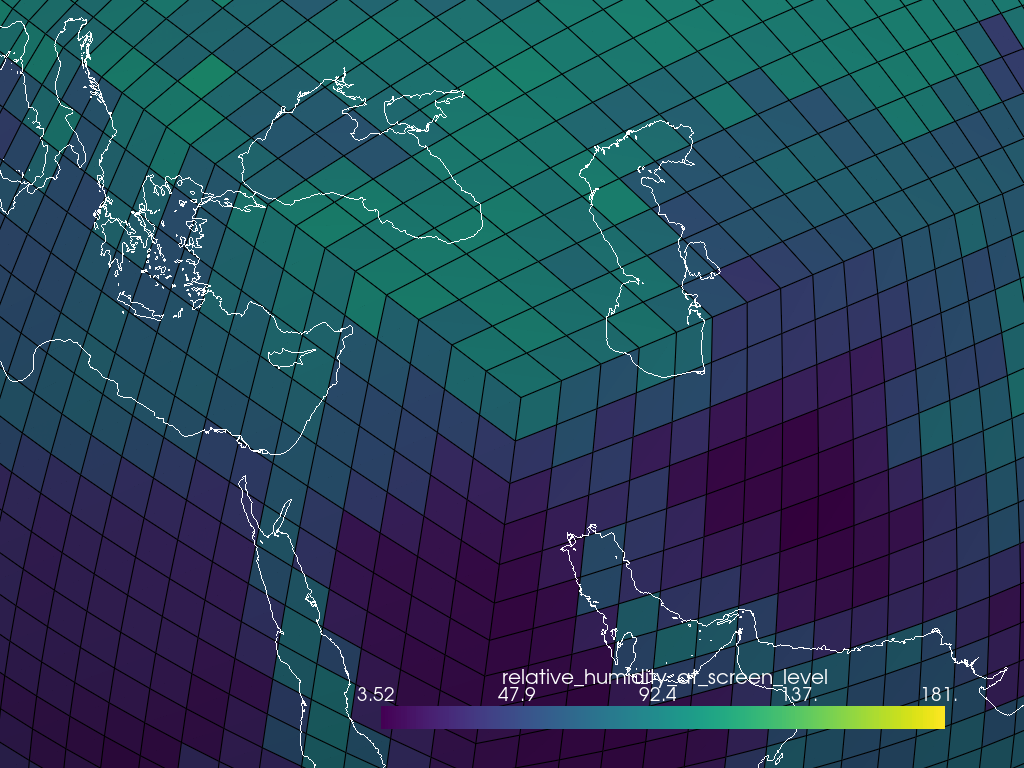

In [13]:
viewpoint = [
    (1.1555926379084704, 1.1347715619001786, 1.1660979285179414),
    (0.0, 0.0, 0.0),
    (-0.3202752464164226, -0.5004192729867467, 0.80436578604284)
]

new_plotter = GeoPlotter()
new_plotter.add_coastlines()
new_plotter.add_mesh(pv, show_edges=True)
new_plotter.camera_position = viewpoint
new_plotter.show(jupyter_backend='static')

## Comparing UM and LFRic fields

For comparing UM and LFRic fields we will now demonstarte how to use structured UM data with GeoVista so that we can compare plots.

Let's start with loading some equivalent UM data. This is structured data,which we could quickly plot with an old-style Iris matplotlib plot.


In [14]:
from testdata_fetching import um_rh_singletime_2d
um_rh = um_rh_singletime_2d()
um_rh.rename('UM Rh data')

#um_rh

#import iris.quickplot as qplt
#qplt.pcolormesh(um_rh)

### Convert the UM cube to a PolyData and plot with GeoVista

To plot the structured UM Iris cube we convert it to a PolyData object with the `pv_from_um_cube` routine availble from [pv_conversions.py](./pv_conversions.py). Using .plot() we can then display the strcutured UM data. This is still traditional structured data on its original UM lat-lon grid. You can see this clearly by zooming in on one pole where the cells get very narrow.

In [ ]:
from pv_conversions import pv_from_um_cube
um_pv = pv_from_um_cube(um_rh)
um_pv.plot()

## Side-by-side plotting: UM vs LFRic data

Let's compare the UM and LFRic data fields by eye, in side-by-side 3D view. This is mostly a demonstration of what can be achieved so we hide the datails in the utility routine [display_demo_routines.side_by_side_plotter](./display_demo_routines.py).

In [ ]:
from display_demo_routines import side_by_side_plotter
plt = side_by_side_plotter(pv, um_pv)
plt.show()

## Projected 2D plotting using GeoVista

As GeoVista is concerned with geolocation, it also understands map projections. This makes it possible to put data on map, producing the more familiar style of 2D plots. 

The simplest solution is to specify a projection with the `crs` keyword in the GeoPlotter constructor call. The argument takes a [proj string](https://proj.org/usage/quickstart.html) to specify the [projection](https://proj.org/operations/projections/index.html). Here's an example, specifying an [Eckart-IV projection](https://proj.org/operations/projections/eck4.html):

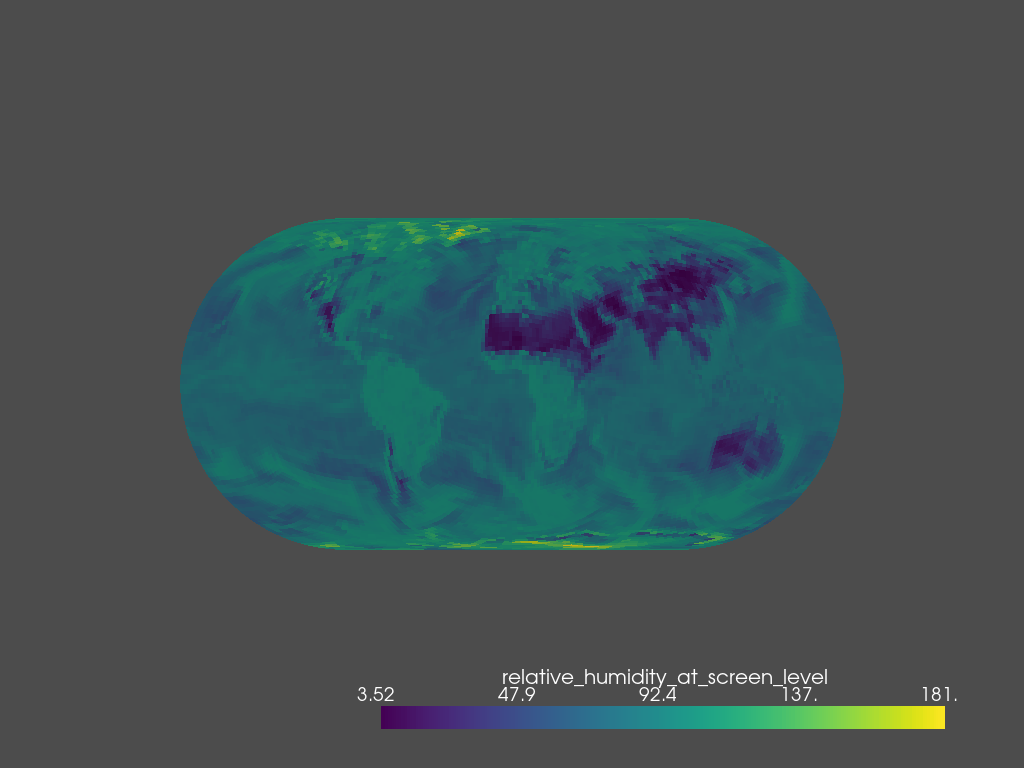

In [15]:
proj_string = '+proj=eck4'
plotter = GeoPlotter(crs=proj_string)
plotter.add_mesh(pv)
# Note: it's important to view down the Z axis
plotter.view_xy()
plotter.show(jupyter_backend='static')

Note these "2D plots" are actually flat objects in a 3D space. If you make an interactive plot, you can rotate the panel. The support for projected plotting is still somewhat experimental. Possibly, not all projections will work correctly. Unfortunately, plotter.add_coastlines() does not yet work with projected plots.


## Next notebook
See the next section: [04 - Regridding and UM data comparison](./Sec_04_Regridding.ipynb)